# Ensemble 

In [4]:
#Import Libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [5]:
# Load the dataset
df = pd.read_csv('preprocessed_loan_data.csv')

In [6]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


In [7]:
# Separate features and target variable
X = df.drop('Default', axis=1)
y = df['Default']

In [8]:
# Handle missing values if any
X = X.fillna(X.median())

In [9]:
# Normalize or scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # 80/20 Split 

## Train and Evaluate Model

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [24]:
# Initialize and train models
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [25]:
# Predict probabilities
y_score_lr = lr_model.predict_proba(X_test)[:, 1]
y_score_rf = rf_model.predict_proba(X_test)[:, 1]
y_score_gb = gb_model.predict_proba(X_test)[:, 1]

# True labels
y_test = y_test

In [26]:
# Calculate ROC curve and ROC AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_score_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

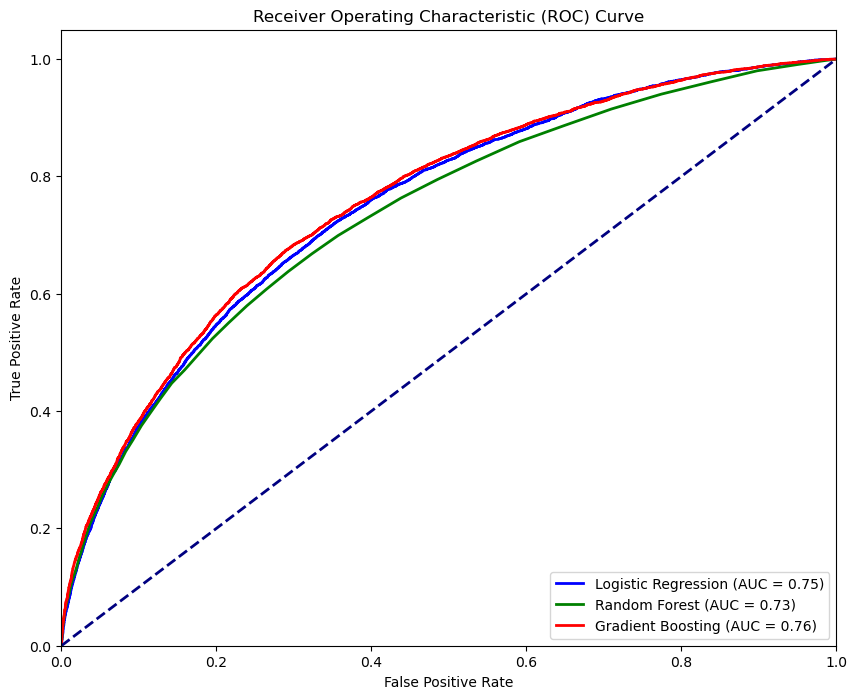

In [27]:
# Plot ROC curve
plt.figure(figsize=(10, 8))

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, color='red', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [28]:
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [29]:
# Predict probabilities
y_score_lr = lr_model.predict_proba(X_test)[:, 1]
y_score_rf = rf_model.predict_proba(X_test)[:, 1]
y_score_gb = gb_model.predict_proba(X_test)[:, 1]

In [30]:
# True labels
y_test = y_test

In [31]:
# Calculate ROC curve and ROC AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_score_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

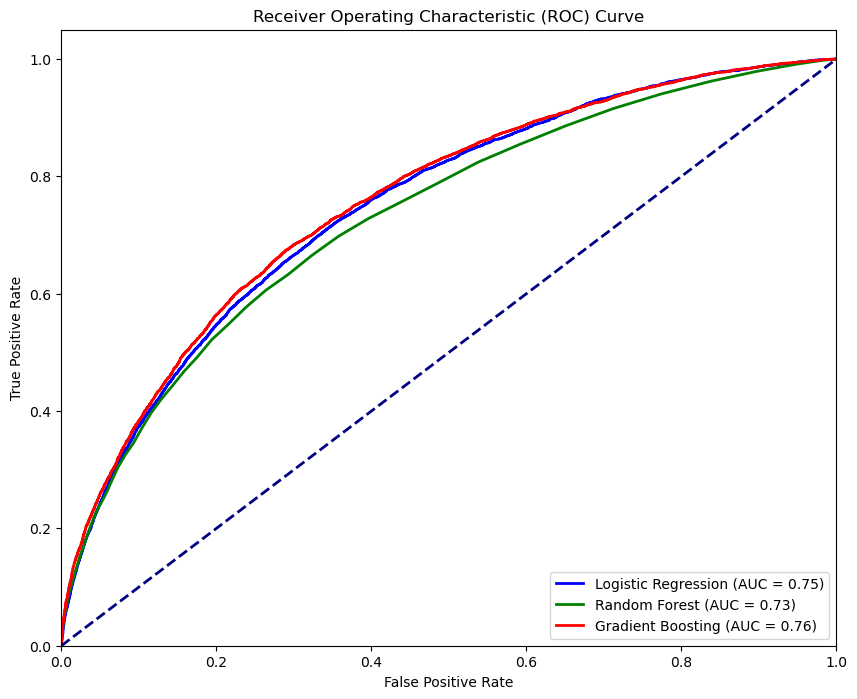

In [32]:
# Plot ROC curve
plt.figure(figsize=(10, 8))

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, color='red', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Calculate Metrics 

In [34]:
from sklearn.metrics import accuracy_score, precision_score


In [35]:
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

In [36]:
# Calculate Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

In [37]:
# Calculate Precision
precision_lr = precision_score(y_test, y_pred_lr)
precision_rf = precision_score(y_test, y_pred_rf)
precision_gb = precision_score(y_test, y_pred_gb)

In [38]:
# Create a DataFrame
metrics_data = {
    'Model Name': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_gb],
    'Precision': [precision_lr, precision_rf, precision_gb]
}

In [39]:

metrics_df = pd.DataFrame(metrics_data)

In [40]:
metrics_df

,Model Name,Accuracy,Precision
0,Logistic Regression,0.885863,0.620339
1,Random Forest,0.886920,0.644342
2,Gradient Boosting,0.887312,0.656587


In [42]:
# Display the table
html_table = metrics_df.to_html(index=False, classes='dataframe table table-striped')

In [43]:
print(html_table)

<table border="1" class="dataframe dataframe table table-striped">
  <thead>
    <tr style="text-align: right;">
      <th>Model Name</th>
      <th>Accuracy</th>
      <th>Precision</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Logistic Regression</td>
      <td>0.885863</td>
      <td>0.620339</td>
    </tr>
    <tr>
      <td>Random Forest</td>
      <td>0.886920</td>
      <td>0.644342</td>
    </tr>
    <tr>
      <td>Gradient Boosting</td>
      <td>0.887312</td>
      <td>0.656587</td>
    </tr>
  </tbody>
</table>


<table border="1" class="dataframe dataframe table table-striped">
  <thead>
    <tr style="text-align: right;">
      <th>Model Name</th>
      <th>Accuracy</th>
      <th>Precision</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Logistic Regression</td>
      <td>0.885863</td>
      <td>0.620339</td>
    </tr>
    <tr>
      <td>Random Forest</td>
      <td>0.886920</td>
      <td>0.644342</td>
    </tr>
    <tr>
      <td>Gradient Boosting</td>
      <td>0.887312</td>
      <td>0.656587</td>
    </tr>
  </tbody>
</table>

## visualizations

### Roc Curve

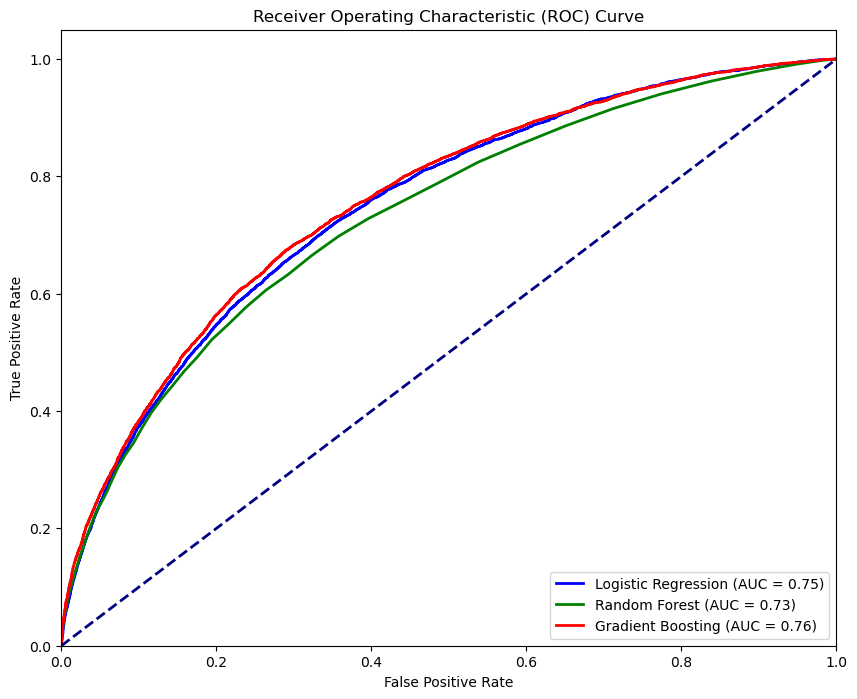

In [44]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_score_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, color='red', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Precision Recall Curve 

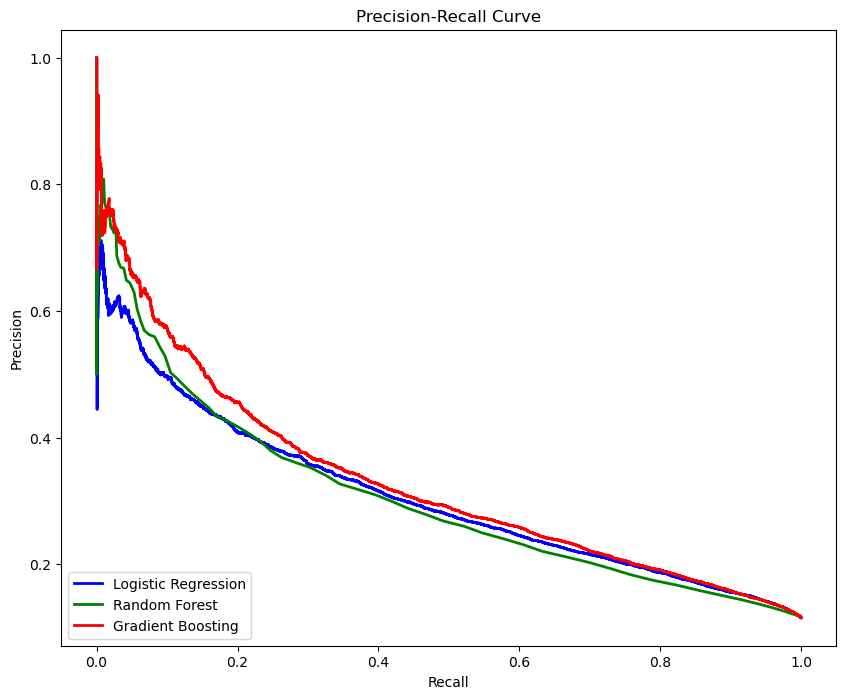

In [45]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision and Recall
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_score_lr)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_score_rf)
precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_score_gb)

plt.figure(figsize=(10, 8))
plt.plot(recall_lr, precision_lr, color='blue', lw=2, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, color='green', lw=2, label='Random Forest')
plt.plot(recall_gb, precision_gb, color='red', lw=2, label='Gradient Boosting')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


### Confusion Matrix HeatMap

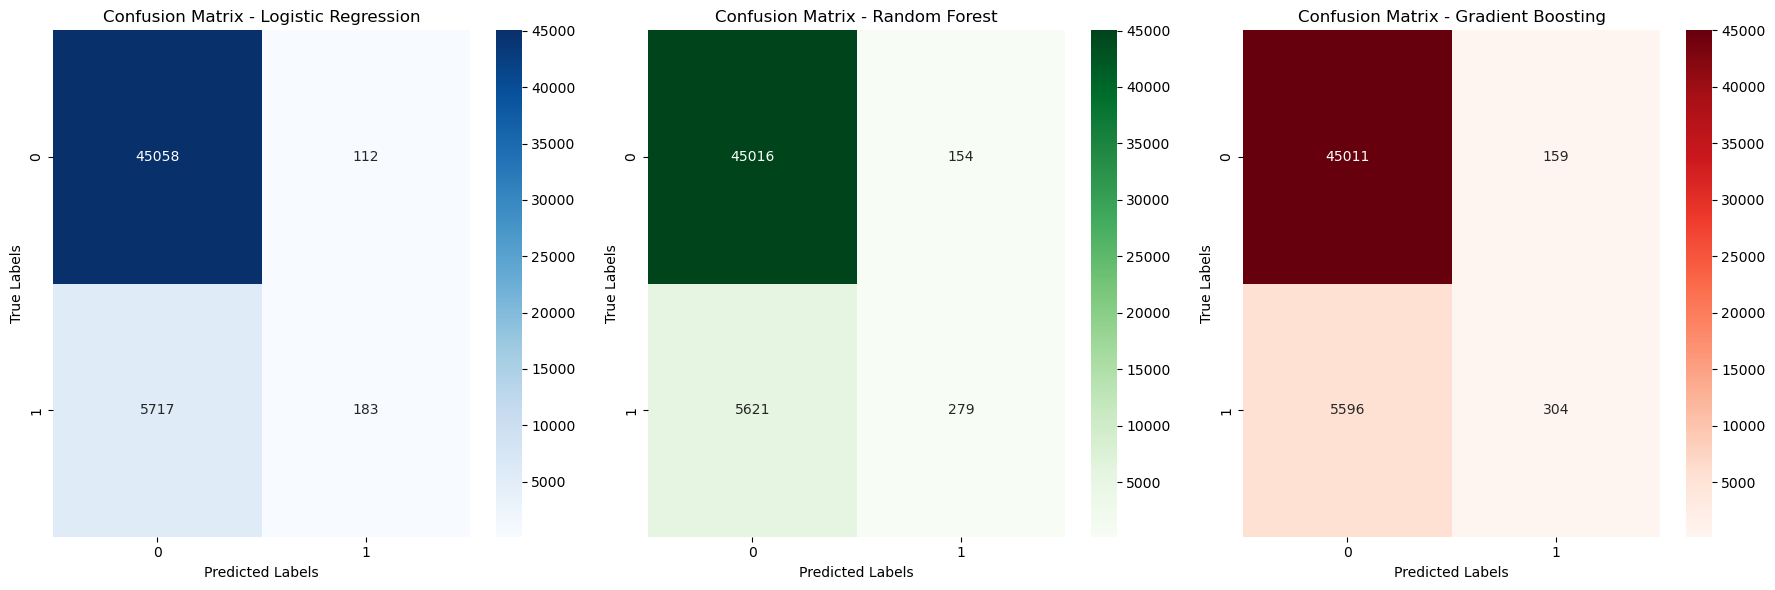

In [46]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_gb = confusion_matrix(y_test, y_pred_gb)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot confusion matrix for Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot confusion matrix for Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Plot confusion matrix for Gradient Boosting
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Reds', ax=axes[2])
axes[2].set_title('Confusion Matrix - Gradient Boosting')
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

<h3>Model Performance Comparison</h3>

<table class="dataframe table table-striped">
  <thead>
    <tr style="text-align: right;">
      <th>Model Name</th>
      <th>Accuracy</th>
      <th>TP</th>
      <th>FP</th>
      <th>TN</th>
      <th>FN</th>
      <th>F1 Score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Logistic Regression</th>
      <td>0.885863</td>
      <td>183.0</td>
      <td>112.0</td>
      <td>45058.0</td>
      <td>5717.0</td>
      <td>0.059080</td>
    </tr>
    <tr>
      <th>Random Forest</th>
      <td>0.886763</td>
      <td>276.0</td>
      <td>159.0</td>
      <td>45011.0</td>
      <td>5624.0</td>
      <td>0.087135</td>
    </tr>
    <tr>
      <th>Gradient Boosting</th>
      <td>0.887312</td>
      <td>304.0</td>
      <td>159.0</td>
      <td>45011.0</td>
      <td>5596.0</td>
      <td>0.095552</td>
    </tr>
  </tbody>
</table>

<h4>Interpretation</h4>

<p><strong>Accuracy:</strong></p>
<ul>
  <li><strong>Logistic Regression:</strong> 88.59%</li>
  <li><strong>Random Forest:</strong> 88.68%</li>
  <li><strong>Gradient Boosting:</strong> 88.73%</li>
</ul>
<p>All models have similar accuracies, ranging between 88.59% and 88.73%. This suggests that the overall performance in terms of correctly predicting both default and non-default cases is comparable across these models.</p>

<p><strong>True Positives (TP):</strong></p>
<ul>
  <li><strong>Logistic Regression:</strong> 183</li>
  <li><strong>Random Forest:</strong> 276</li>
  <li><strong>Gradient Boosting:</strong> 304</li>
</ul>
<p>Gradient Boosting has the highest number of True Positives, indicating it correctly identifies the most default cases among the models. This suggests that Gradient Boosting is better at detecting defaults compared to the other models.</p>

<p><strong>False Positives (FP):</strong></p>
<ul>
  <li><strong>Logistic Regression:</strong> 112</li>
  <li><strong>Random Forest:</strong> 159</li>
  <li><strong>Gradient Boosting:</strong> 159</li>
</ul>
<p>Both Random Forest and Gradient Boosting have the same number of False Positives, which is higher than Logistic Regression. This means that Random Forest and Gradient Boosting are more likely to incorrectly predict non-default cases as defaults compared to Logistic Regression.</p>

<p><strong>True Negatives (TN):</strong></p>
<ul>
  <li><strong>Logistic Regression:</strong> 45,058</li>
  <li><strong>Random Forest:</strong> 45,011</li>
  <li><strong>Gradient Boosting:</strong> 45,011</li>
</ul>
<p>Logistic Regression has the highest number of True Negatives, suggesting it is better at correctly identifying non-default cases. This is a positive aspect if avoiding false positives (predicting a non-default as default) is critical.</p>

<p><strong>False Negatives (FN):</strong></p>
<ul>
  <li><strong>Logistic Regression:</strong> 5,717</li>
  <li><strong>Random Forest:</strong> 5,624</li>
  <li><strong>Gradient Boosting:</strong> 5,596</li>
</ul>
<p>Gradient Boosting has the lowest number of False Negatives, which means it misses the fewest actual default cases. This is beneficial if the cost of failing to identify a default (missing a default) is high.</p>

<p><strong>F1 Score:</strong></p>
<ul>
  <li><strong>Logistic Regression:</strong> 0.059080</li>
  <li><strong>Random Forest:</strong> 0.087135</li>
  <li><strong>Gradient Boosting:</strong> 0.095552</li>
</ul>
<p>The F1 Score balances Precision and Recall. Gradient Boosting has the highest F1 Score, indicating it provides the best trade-off between Precision (how many of the predicted defaults are actual defaults) and Recall (how many of the actual defaults are correctly predicted). This makes Gradient Boosting the most balanced model in terms of handling false positives and false negatives.</p>

<h4>Summary</h4>
<ul>
  <li><strong>Gradient Boosting:</strong> This model seems to be the best performer overall. It has the highest True Positives and F1 Score, suggesting it’s the most effective at detecting defaults with a balanced trade-off between Precision and Recall. It does, however, have a similar number of False Positives as Random Forest, so the cost of false alarms remains a consideration.</li>
  <li><strong>Random Forest:</strong> This model performs slightly worse than Gradient Boosting in terms of True Positives and F1 Score but is very close. Its False Positives are also higher than Logistic Regression, which might be a downside if minimizing false alarms is critical.</li>
  <li><strong>Logistic Regression:</strong> This model performs well in terms of True Negatives, suggesting it effectively identifies non-default cases, but it has the lowest F1 Score and True Positives. This indicates it might be less effective at detecting defaults compared to the other models.</li>
</ul>
